# Report of Mini-Project1: Feature Extraction and Transfer Learning

## Team Members
- Chien-Sheng WU  
    - Feature Extraction (ScatNet), Visualization (PCA, UMAP), Classification (LogReg, LDA), Analysis, Report
- Peng XU 
    - Feature Extraction (ResNet), Visualization (t-SNE), Classification (RandForest), Analysis, Report, fine tuning Resnet18
- Nayeon LEE 
    - Visualization (Manifold - LLE), Classification (SVM), Analysis, Report
    
    
## Dataset (Fashion-MNIST) 
https://github.com/zalandoresearch/fashion-mnist

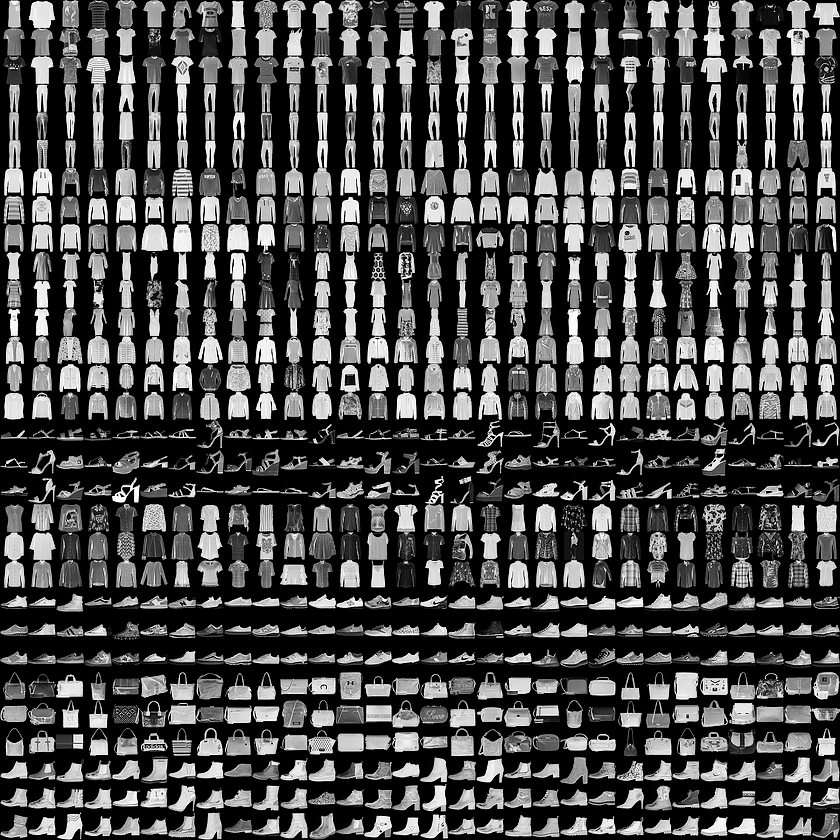

In [6]:
from IPython.display import Image
Image("img/fashion-mnist-sprite.png")

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.
The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others." Zalando seeks to replace the original MNIST dataset

Quoted from their website, they claimed that “MNIST is too easy. Convolutional nets can achieve 99.7% on MNIST. Classic machine learning algorithms can also achieve 97% easily. Check out our side-by-side benchmark for Fashion-MNIST vs. MNIST, and read "Most pairs of MNIST digits can be distinguished pretty well by just one pixel." MNIST is overused. In this April 2017 Twitter thread, Google Brain research scientist and deep learning expert Ian Goodfellow calls for people to move away from MNIST. MNIST cannot represent modern CV tasks, as noted in this April 2017 Twitter thread, deep learning expert/Keras author François Chollet.”

Each training and test example is assigned to one of the following labels: 
0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot 

## Feature Extraction

origin pictures are with size 28 * 28 in gray scale. That is, each picture has raw features with size 784 

#### Scattering Networks (ScatNet)

- Files: features/SX_train_176.npy, features/SX_test_176.npy
- Code: feature_extract_scat.ipynb, scat/

Here we mainly use the features extracted from the ScatNet with the parameter as following
```
J (the maximum scale of the transform) = 3
M (the maximum scattering order) = 2
L (the number of different orientations) = 1
```
with this setting, the output we concatenated all the output features together and get a feature with size 176


#### Residual Networks (ResNet)
- We use pre-trained 18 layers Residual Network from Imagenet with PyTorch. 
- Residual Networks (ResNet) is  a residual learning framework to ease the training of networks that are substantially deeper than those used previously.
- We mainly use it for two aims: feature extraction and fine tuning. 
    - For feature extraction, we take the representation right before the last fully connected layer, which gives us 512-dim representation of image. 
    - |For fine tuning, we try two methods, full fine tuning and layer layer tuning.

## Feature Visualization

### We compare 4 kinds of visualization ways: PCA, t-SNE, LLE, UMAP

| index | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|-------|---|---|---|---|---|---|---|---|---|---|
| Type  |T-shirt/top | Trouser | Pullover| Dress| Coat| Sandal| Shirt| Sneaker| Bag| Ankle boot |
| Color |'magenta'| 'cyan'| 'red'| 'green'| 'blue'| 'black'| 'yellow'| 'orange'|'navy'| 'gray'|


#### Principal Component Analysis (PCA)

- Code: PCA.ipynb

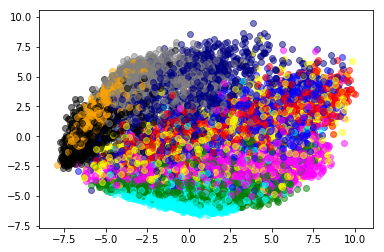

In [9]:
plt.show() # Raw Features

/home/jason/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


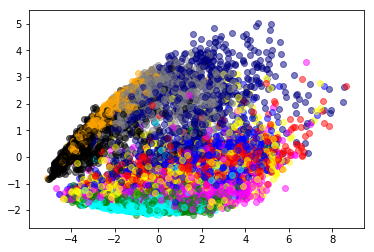

In [6]:
plt.show() # ScatNet176 features 

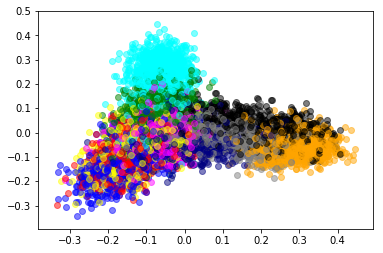

In [6]:
plt.show() # Resnet18 features 

#### t-Distributed Stochastic Neighbor Embedding (t-SNE)
- Code: t_SNE.ipynb

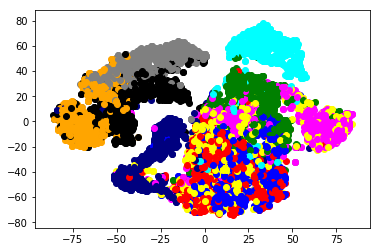

In [11]:
plt.show()  # Raw Features

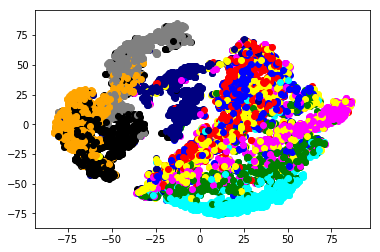

In [5]:
plt.show()  # ScatNet 176 Features

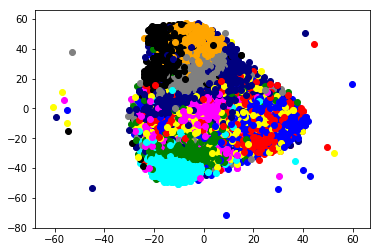

In [9]:
plt.show() # Resnet18 Features

#### Manifold - Locally Linear Embedding (LLE)
- Code: LLE.ipynb

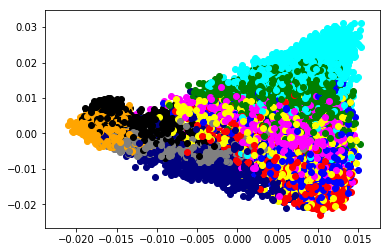

In [3]:
# Raw Features
from IPython.display import Image
Image("img/raw.png")

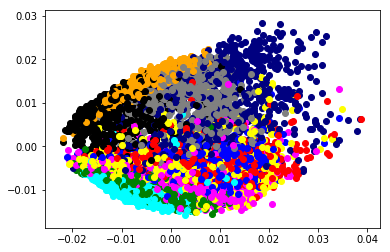

In [3]:
# ScatNetx Features
Image("img/scatNet.png")

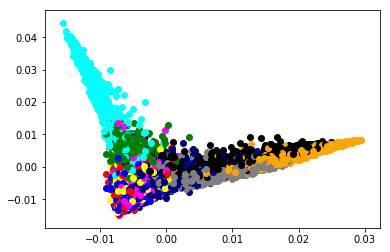

In [4]:
# Resnet18 Features
Image("img/resNet.png")

#### Uniform Manifold Approximation and Projection (UMAP)
- Code: UMAP.ipynb

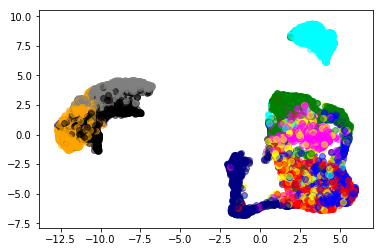

In [4]:
plt.show() # Raw Features

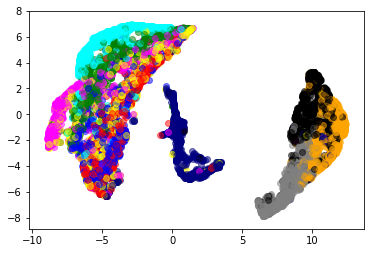

In [5]:
plt.show() # ScatNet

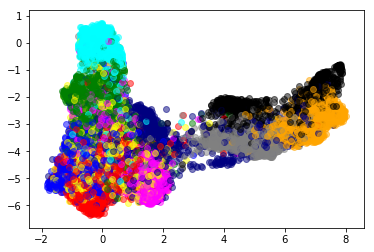

In [13]:
plt.show() # ResNet Features

## Classification Results
### We tried 4 different models in our case: Logistic Regression, LDA, SVM, and Random Forest
- Code: logistic_regression.ipynb, LDA.ipynb, SVM.ipynb, random_forest.ipynb

| Models                             | Raw Features 784 | ScatNet Features 176 | ResNet Features 512 ||  Average|
|------------------------------------|------------------|----------------------|---------------------||------------|
| Logistic Regression                |      84.60%      |        80.83%        |        79.03%       || 81.49%
| Linear Discriminant Analysis (LDA) |      81.51%      |        79.96%        |        77.08%       || 79.52%
| Support Vector Machine (SVM)       |      78.84%      |        82.60%        |        73.63%       || 78.36%
| Random Forest                      |      87.12%      |        83.06%        |        59.20%       || 76.46%
|||||||
| Average                            |       83.01%     |        81.61%        |        72.24%       | |

## Analysis and Discussion

### What can we interpret from these visualization?
- In general, features from ScatNet somehow has similar distribution to raw features.
- For PCA and LLE, the feature visualization tends to be line-wised. That is, the features in 2D space are in layers by layers. 
- On the other hand, t-SNE and UMAP visualization are more block-like, which means that the same label data are clustered together.
- For orange, black and gray color, which are "sneaker", "sandal" and "Ankle boot" respectively, one can find that no matter which visualization tools we used, these three groups tend to cluster nearby. Because they all belong to "shoe" type of pictures, they also look similar in the raw picutres.


### Which visualization method can help us more to see the trend?
- In our experiments, we found t-SNE and UMAP work better than LLE and PCA, because they can separate each label further. 
- For examples, 
    - the navy color group in t-SNE and UMAP is considerablly further away from other color groups. It belongs to the "Bag" type of images, which are significantly different from other types.
    - the "shoe" type also tends to group together, isolated from others.

### Which kind of feature is better? Why?
- Based on the results in our Table, it is surprising that the raw features perform better (83.01%) in average. 
- This may be caused by the information loss during the feature extraction.
- First of all, for Scattering Network, the features reduced from 784 to 176. Also, Scattering Network itself tends to extract the features by Wavelet transform, which puts a bias that only the differences between signals are important (the high pass and low pass filters).
- Secondly, the ResNet feature extraction is trained based on the ImageNet pictures, which are colorful and have high dimension compared to our dataset. That's why we may need some fine-tune for better performance.


### Which classifier is better? Why?
- Based on our results, Logistic regression got the highest average accuracy (81.49%) amongst all the methods. 
- However, the best result (87.12%) is attained by Random Forest method, which is one of the decision tree methods. We guess that it works better, because Random Forest used ensemble method that can cover different kind of data bias.
- One interesting point is that Random Forest got very bad results on ResNet features, no matter what parameters we tried. For other feature we got around 99% in training data, but we only got around 86% in training data here. The problem is obviously underfitting. Maybe the ResNet features in this case are not that easy to separate.


### What did other latest models (ex: ) perform on this dataset?
| Classifier | Preprocessing | Fashion test accuracy | 
| --- | --- | --- |
|Human Performance| Crowd-sourced evaluation of human (with no fashion expertise) performance. 1000 randomly sampled test images, 3 labels per image, majority labelling. | 0.835 | 
|HOG+SVM| HOG | 0.926 |
|XgBoost| scaling the pixel values to mean=0.0 and var=1.0| 0.898|
|2 Conv Layers with max pooling (Keras) | None | 0.876 |
|2 Conv Layers with max pooling (Tensorflow) >300 epochs | None | 0.916|
|2 Conv Layers with max pooling and ELU activation (PyTorch)| None| 0.903| 
|2 Conv Layers net | Normalization, random horizontal flip, random vertical flip, random translation, random rotation. | 0.919 |
|2 Conv Layers with 3 FC 500K parameters | Augmentation, batch normalization | 0.934 | 
|3 Conv+pooling and 2 FC+dropout | None | 0.926 |
|Capsule Network 8M parameters| Normalization and shift at most 2 pixel and horizontal flip | 0.936 |
|CNN with optional shortcuts, dense-like connectivity| standardization+augmentation+random erasing | 0.947 |
|ResNet18 | Normalization, random horizontal flip, random vertical flip, random translation, random rotation. | 0.949 |
|GoogleNet with cross-entropy loss | None | 0.937 |
|Dual path network with wide resnet 28-10|standard preprocessing (mean/std subtraction/division) and augmentation (random crops/horizontal flips) |0.957|
|VGG16 26M parameters | None | 0.935|
|WRN40-4 8.9M params | standard preprocessing (mean/std subtraction/division) and augmentation (random crops/horizontal flips)|  0.967 |

## Bonus: Fine-Tuning the ResNet

| Models                             | Accuracy |
|------------------------------------|------------------|
| Last layer fine tune           |    0.8617|
| Full fine tune                |     0.9342      |      

- We try to fully fine-tune ResNet model based on our dataset. 
- We got the best around 93.42%. 
- Full fine tuning achieves the best result among all classifiers, which shows that features extracted from other datasets cannot generalize well to new datasets with different bias.